In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import AffineTransform, warp

## Create Source Image:

Example 1:

In [2]:
def create_alternating_color_grid(size=50, pixel_interval_x=1, pixel_interval_y=1, color1=(255, 0, 0), color2=(0, 0, 255), color3=None):
    """
    Create an image where pixels alternate colors every `pixel_interval_x` and `pixel_interval_y` pixels.
    If `color3` is provided, the grid will alternate between three colors. Otherwise, it alternates between two colors.
    """
    img = np.zeros((size, size, 3), dtype=np.uint8)
    
    # Set alternating colors based on x and y pixel intervals
    for i in range(size):
        for j in range(size):
            if color3 is None:
                # Alternate between two colors
                if ((i // pixel_interval_y) + (j // pixel_interval_x)) % 2 == 0:
                    img[i, j] = color1  # First color
                else:
                    img[i, j] = color2  # Second color
            else:
                # Alternate between three colors
                color_choice = ((i // pixel_interval_y) + (j // pixel_interval_x)) % 3
                if color_choice == 0:
                    img[i, j] = color1  # First color
                elif color_choice == 1:
                    img[i, j] = color2  # Second color
                else:
                    img[i, j] = color3  # Third color

    return img

### Transform image:

In [3]:
def shear_image(image, shear_factor, interpolation):
    """Apply shear to the image using the specified interpolation with black margins."""
    tform = AffineTransform(shear=np.deg2rad(shear_factor))
    # Set mode to 'constant' and cval=0 to see black margins
    return warp(image, tform, mode='constant', cval=0, order=interpolation)


def rotate_image(image, angle, interpolation):
    """Apply rotation to the image using the specified interpolation."""
    size = image.shape[0]
    center = (size // 2, size // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (size, size), flags=interpolation)

## Run Transformations and Plot

In [4]:
def plot_source_and_transformed(original, transformed_images, interpolation_labels, title, filename=None):
    """Plot source and transformed images side by side with different interpolations, and save plot."""
    fig, axs = plt.subplots(1, len(transformed_images) + 1, figsize=(16, 4))

    # Plot source image
    axs[0].imshow(original)
    axs[0].set_title("Source Image")
    axs[0].axis('off')

    # Plot transformed images
    for i, (transformed, label) in enumerate(zip(transformed_images, interpolation_labels)):
        axs[i + 1].imshow(transformed)
        axs[i + 1].set_title(f'{label} Interpolation')
        axs[i + 1].axis('off')

    fig.suptitle(title, fontsize=22)

    # Save plot if filename is provided
    if filename:
        plt.savefig(filename, bbox_inches='tight')

    plt.show()


def run_transformations(image, shear_factor, rotation_angle, interpolation_labels, filename_prefix):
    """Run shearing and rotation transformations and plot the results."""
    
    # Apply shearing with different interpolations
    nearest_shear = shear_image(image, shear_factor, interpolation=0)  # Nearest neighbor
    linear_shear = shear_image(image, shear_factor, interpolation=1)  # Bilinear
    cubic_shear = shear_image(image, shear_factor, interpolation=3)  # Bicubic

    # Apply rotation with different interpolations
    nearest_rotate = rotate_image(image, rotation_angle, interpolation=cv2.INTER_NEAREST)
    linear_rotate = rotate_image(image, rotation_angle, interpolation=cv2.INTER_LINEAR)
    cubic_rotate = rotate_image(image, rotation_angle, interpolation=cv2.INTER_CUBIC)

    # Combine the transformed images and labels for shearing and rotation
    shear_transformed_images = [nearest_shear, linear_shear, cubic_shear]
    rotate_transformed_images = [nearest_rotate, linear_rotate, cubic_rotate]

    # Plot and save the source and sheared images
    plot_source_and_transformed(
        image, shear_transformed_images, interpolation_labels,
        title='Shearing with Different Interpolations',
        filename=f'../static/img/interpolation_shearing.png'
    )

    # Plot and save the source and rotated images
    plot_source_and_transformed(
        image, rotate_transformed_images, interpolation_labels,
        title='Rotation with Different Interpolations',
        filename=f'../static/img/interpolation_rotation.png'
    )


### Set parameters:

In [5]:
# Customize your parameters here
pixel_interval_x = 3  # Change colors every `x` pixels along the x-axis
pixel_interval_y = 1  # Change colors every `y` pixels along the y-axis
color1 = (255, 0, 0)  # Red
color2 = (0, 0, 255)  # Blue
color3 = (0, 255, 0) # Green - optional
shear_factor = 25  # Shear angle in degrees
rotation_angle = 30  # Rotation angle in degrees
interpolation_labels = ['Nearest', 'Linear', 'Cubic']

### Run:

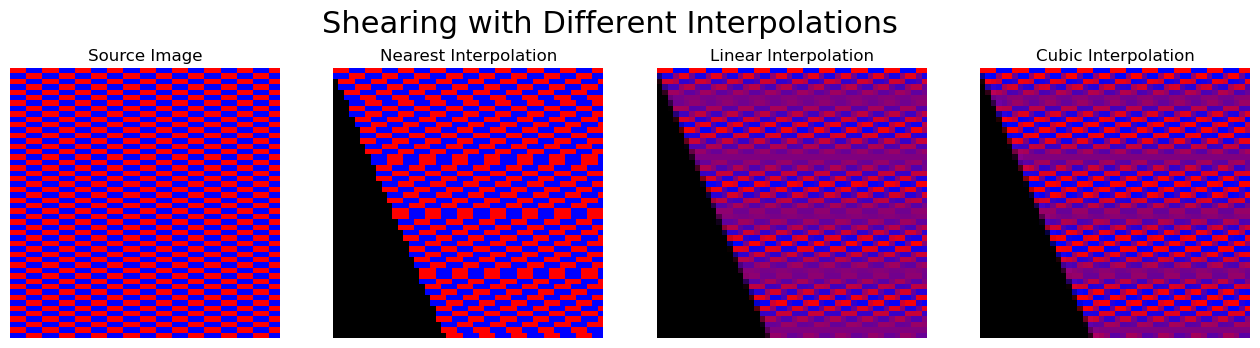

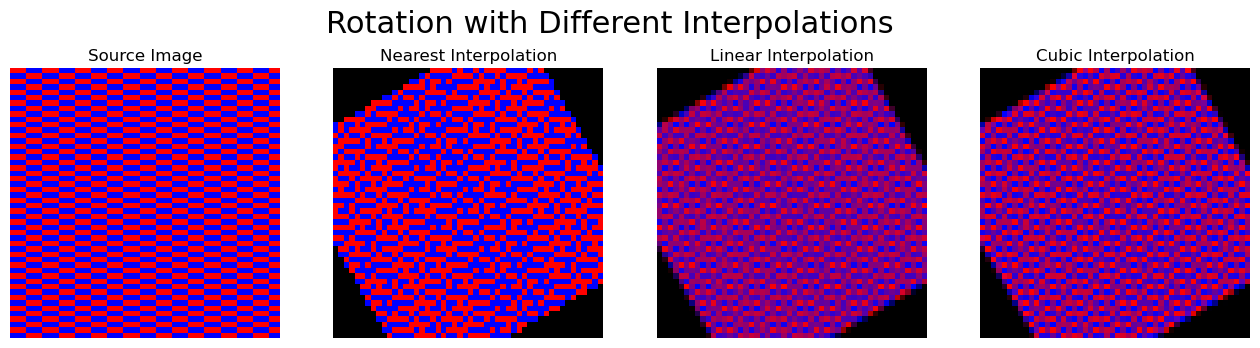

In [6]:
# Create an image with alternating colors and pixel intervals
image = create_alternating_color_grid(size=50, pixel_interval_x=pixel_interval_x, pixel_interval_y=pixel_interval_y, color1=color1, color2=color2)

# Run the transformations and save plots
run_transformations(image, shear_factor, rotation_angle, interpolation_labels, filename_prefix="transformation_results")


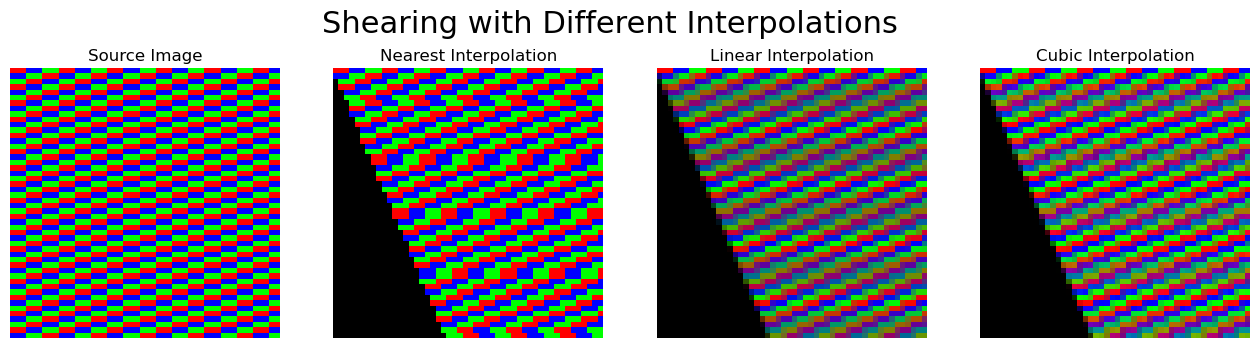

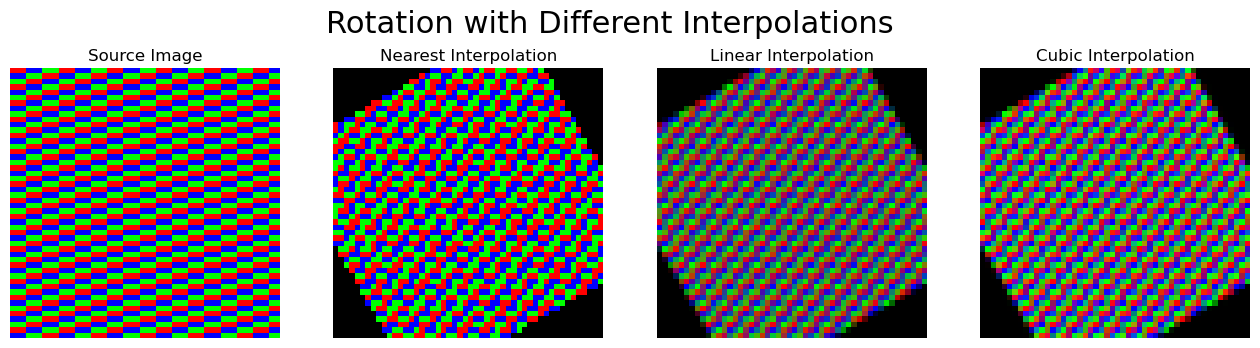

In [7]:
# Create an image with alternating colors and pixel intervals
image = create_alternating_color_grid(size=50, pixel_interval_x=pixel_interval_x, pixel_interval_y=pixel_interval_y, color1=color1, color2=color2, color3=color3)

# Run the transformations and save plots
run_transformations(image, shear_factor, rotation_angle, interpolation_labels, filename_prefix="transformation_results")
